In [123]:
import sys
print(sys.executable)

/usr/local/bin/python3.13


In [124]:
# Include necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [125]:
# Define file path
file_path = "/Users/sillymoonie/Desktop/AI-Impact-Job/dataset/job_ai_data.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()


,job_title,ai_impact,task_count,ai_model,ai_workload_ratio,domain_area
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


In [126]:
# Clean and Prepare the Data


# 2. Check for Missing Values
df.isnull().sum()

# 3. Check Data Types
df.dtypes

job_title             object
ai_impact             object
task_count             int64
ai_model               int64
ai_workload_ratio    float64
domain_area           object
dtype: object

/var/folders/3r/gb9k1tyd1pb5mknr38x_7jlc0000gn/T/ipykernel_44432/1922404127.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="domain_area", y="ai_impact", data=df, palette="coolwarm")


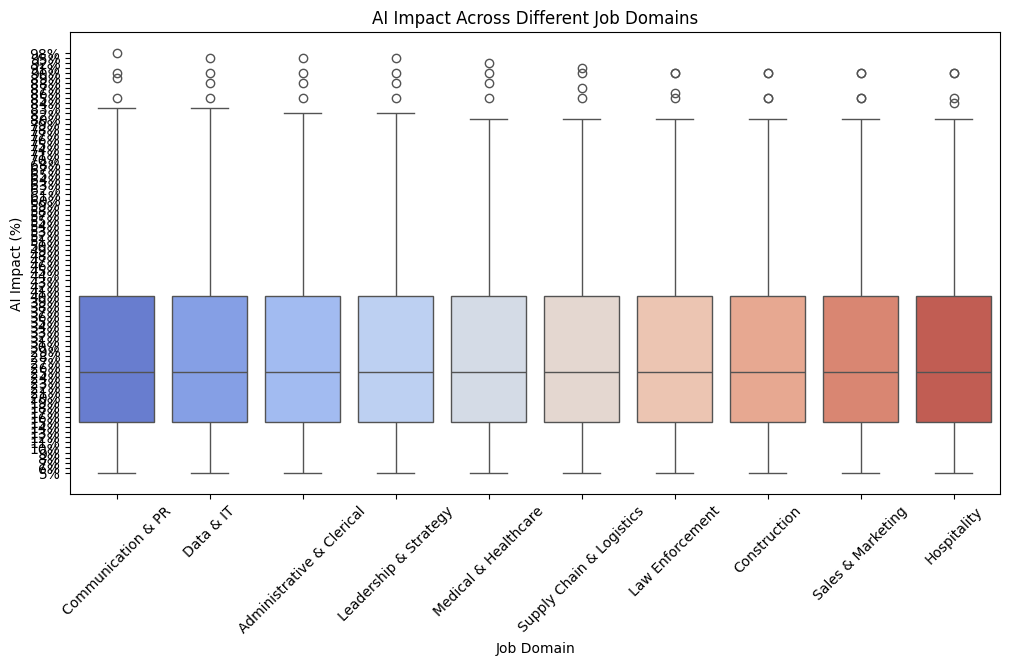

In [127]:
# Distribution of AI Impact on Different Job Domains
plt.figure(figsize=(12, 6))
sns.boxplot(x="domain_area", y="ai_impact", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("AI Impact Across Different Job Domains")
plt.xlabel("Job Domain")
plt.ylabel("AI Impact (%)")
plt.show()


Analysis of the Boxplot: AI Impact Across Different Job Domains
This boxplot represents the distribution of AI impact (%) across different job domains. Here’s what we can infer from this visualization:

1. AI Impact is Similar Across Job Domains
• The median AI impact across all job domains seems to be around 40%.
• The interquartile range (IQR) is consistent across different job fields.
• This suggests that AI’s influence is fairly uniform across industries, rather than being concentrated in just a few domains.

2. Significant Presence of High-AI-Impact Jobs (Outliers)
• Each job domain has a lot of outliers above 80%, meaning some jobs in every industry are highly vulnerable to automation.
• The presence of many high-AI-impact outliers suggests certain roles in each sector are at extreme risk of automation (e.g., repetitive or rule-based tasks like data entry or clerical jobs).

3.  AI Impact Distribution Shows a Right-Skewed Trend
• The upper whiskers extend further than the lower whiskers, indicating that while most jobs have moderate AI impact, a significant minority of jobs are at extreme risk.
• This could mean that AI is automating specialized high-risk tasks in every sector, but not necessarily affecting all roles equally.

4. Implications for Different Sectors
• Data & IT, Administrative & Clerical, and Communication & PR appear to have similar AI impact ranges.
• Industries like Medical & Healthcare, Law Enforcement, and Supply Chain & Logistics—while still affected—may have a broader range of job types, leading to a wider spread in AI impact.

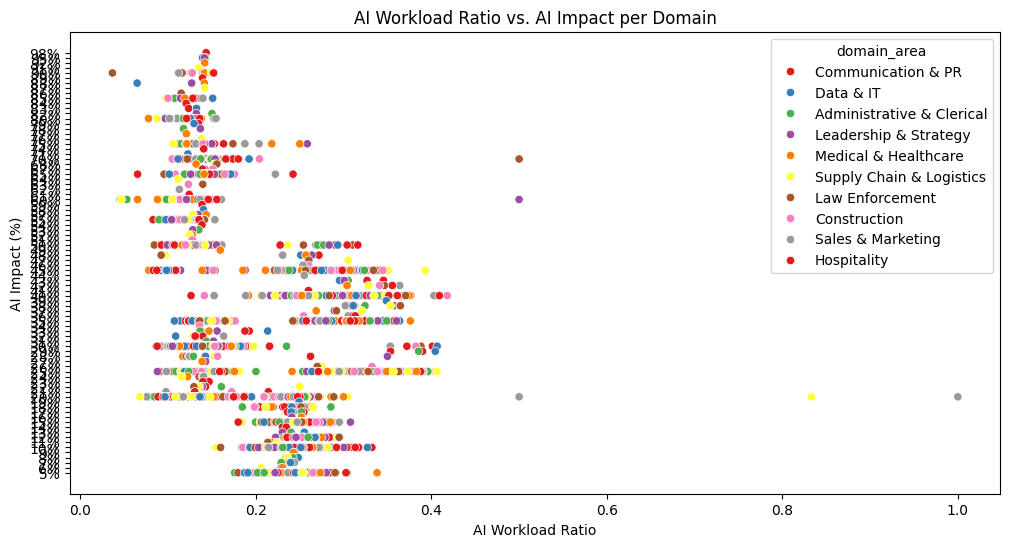

In [128]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="ai_workload_ratio", y="ai_impact", hue="domain_area", data=df, palette="Set1")
plt.title("AI Workload Ratio vs. AI Impact per Domain")
plt.xlabel("AI Workload Ratio")
plt.ylabel("AI Impact (%)")
plt.show()

Random Forest Method

In [129]:
# Check for NaN (missing values)
print(X_train.isnull().sum())

# Check for infinite values
print(np.isinf(X_train).sum())

# Check for extremely large values
print(X_train.describe())

task_count           0
ai_model             0
ai_workload_ratio    0
dtype: int64
task_count           0
ai_model             0
ai_workload_ratio    0
dtype: int64
        task_count     ai_model  ai_workload_ratio
count  3764.000000  3764.000000        3764.000000
mean    401.135228  1815.809777           0.205225
std     311.358985  1084.196140           0.077099
min       1.000000     0.000000           0.036585
25%     162.000000  1092.500000           0.137750
50%     272.000000  1582.500000           0.199684
75%     606.250000  2265.250000           0.261288
max    1387.000000  5666.000000           1.000000


In [130]:
# Replace inf values with NaN first
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median
X_train["ai_workload_ratio"] = X_train["ai_workload_ratio"].fillna(X_train["ai_workload_ratio"].median())
X_test["ai_workload_ratio"] = X_test["ai_workload_ratio"].fillna(X_test["ai_workload_ratio"].median())

# Check if 'inf' values are still present
print("\n✅ Checking right after replacing:")
print("Infinite values per column:")
print(np.isinf(X_train).sum())



✅ Checking right after replacing:
Infinite values per column:
task_count           0
ai_model             0
ai_workload_ratio    0
dtype: int64


In [131]:
# Checking for inf
print("🔹 Checking for NaN values:")
print(X_train.isnull().sum())

print("\n🔹 Checking for infinite values:")
print(np.isinf(X_train).sum())

print("\n🔹 Descriptive statistics of X_train:")
print(X_train.describe())


🔹 Checking for NaN values:
task_count           0
ai_model             0
ai_workload_ratio    0
dtype: int64

🔹 Checking for infinite values:
task_count           0
ai_model             0
ai_workload_ratio    0
dtype: int64

🔹 Descriptive statistics of X_train:
        task_count     ai_model  ai_workload_ratio
count  3764.000000  3764.000000        3764.000000
mean    401.135228  1815.809777           0.205225
std     311.358985  1084.196140           0.077099
min       1.000000     0.000000           0.036585
25%     162.000000  1092.500000           0.137750
50%     272.000000  1582.500000           0.199684
75%     606.250000  2265.250000           0.261288
max    1387.000000  5666.000000           1.000000


In [132]:
# Find the maximum finite value for 'ai_workload_ratio'
max_finite_value = X_train.loc[np.isfinite(X_train["ai_workload_ratio"]), "ai_workload_ratio"].max()

# Replace any remaining inf values
X_train["ai_workload_ratio"] = X_train["ai_workload_ratio"].replace([np.inf, -np.inf], max_finite_value)
X_test["ai_workload_ratio"] = X_test["ai_workload_ratio"].replace([np.inf, -np.inf], max_finite_value)

print("\n🔹 Checking for infinite values after final fix:")
print(np.isinf(X_train).sum())  # Should print all zeros

print("\n🔹 Descriptive statistics of X_train after final fix:")
print(X_train.describe())  # Should no longer show 'inf'




🔹 Checking for infinite values after final fix:
task_count           0
ai_model             0
ai_workload_ratio    0
dtype: int64

🔹 Descriptive statistics of X_train after final fix:
        task_count     ai_model  ai_workload_ratio
count  3764.000000  3764.000000        3764.000000
mean    401.135228  1815.809777           0.205225
std     311.358985  1084.196140           0.077099
min       1.000000     0.000000           0.036585
25%     162.000000  1092.500000           0.137750
50%     272.000000  1582.500000           0.199684
75%     606.250000  2265.250000           0.261288
max    1387.000000  5666.000000           1.000000


***Data cleaning for Random Forest end****
Training Section Start

In [133]:

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Model trained successfully!")


Model trained successfully!


In [134]:
# 1. Evaluate model Performance
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
print(f" Mean Absolute Error: {mae:.2f}")

 Mean Absolute Error: 9.62


In [135]:
# 2. Check Features Importance
# Extract feature importance from the model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print("Feature Importance:\n")
print(feature_importance_df)

Feature Importance:

             Feature  Importance
2  ai_workload_ratio    0.540956
1           ai_model    0.244001
0         task_count    0.215044


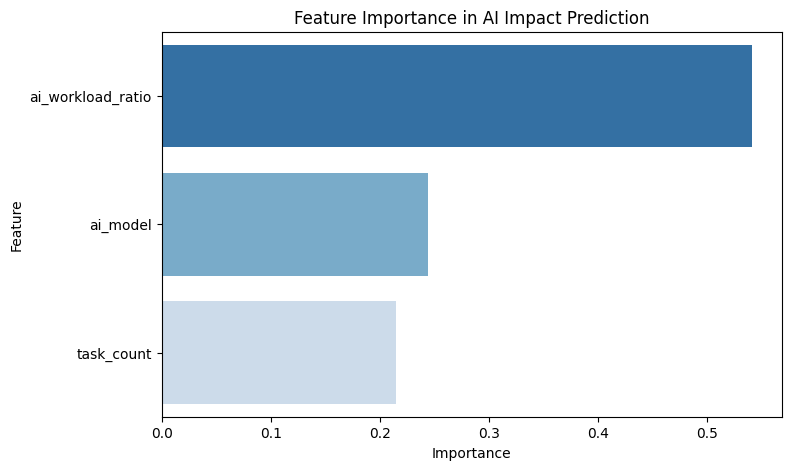

In [136]:
# 3. Visualize Features Importance
plt.figure(figsize=(8, 5))

# Updated syntax for Seaborn
sns.barplot(
    x="Importance", 
    y="Feature", 
    data=feature_importance_df, 
    hue="Feature", 
    legend=False, 
    palette="Blues_r"
)

plt.title("Feature Importance in AI Impact Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

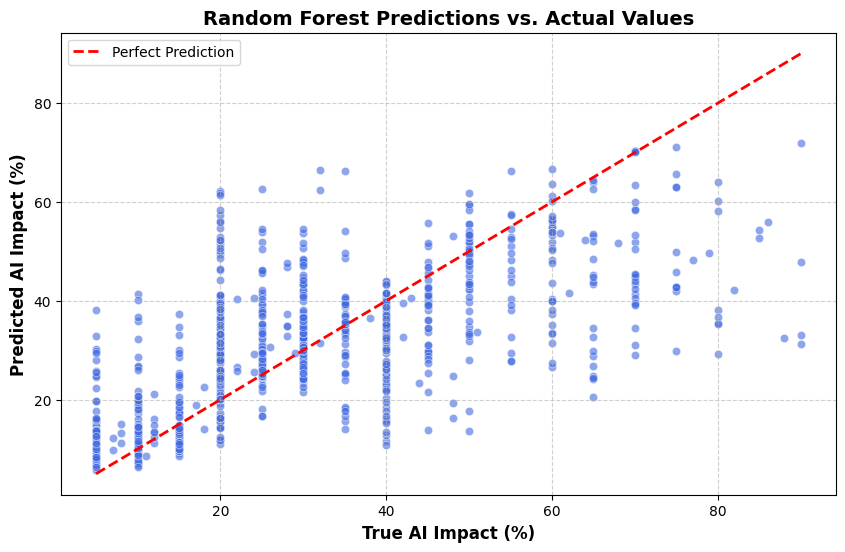

In [137]:
#4. Compare Prediction vs True Value
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="royalblue") 

plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("True AI Impact (%)", fontsize=12, fontweight="bold")
plt.ylabel("Predicted AI Impact (%)", fontsize=12, fontweight="bold")
plt.title("Random Forest Predictions vs. Actual Values", fontsize=14, fontweight="bold")

min_val, max_val = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="dashed", linewidth=2, label="Perfect Prediction")

plt.legend()

plt.show()

In [138]:
#5. Make Prediction for New Jobs
# Example new job (modify values as needed)
new_job = pd.DataFrame({
    "task_count": [300],   # Number of job tasks
    "ai_model": [2000],    # AI model usage for the job
    "ai_workload_ratio": [0.2]  # AI workload ratio
})

# Predict AI impact for the new job
predicted_impact = rf_model.predict(new_job)
print(f"Predicted AI Impact: {predicted_impact[0]:.2f}%")


Predicted AI Impact: 10.08%


***Findings***
1. MAE: 9.62%
• Decent model accuracy, but room for improvement.
2. Feature Importance
• AI Workload Ratio is the strongest predictor of AI impact.
3. Prediction vs Actual
• Model performs well for low-impact jobs but struggles with high-impact jobs.
4. New Job Prediction
• Low AI impact (~10%) due to low AI workload ratio (0.2).

****Random Forest for Domain Area****

In [139]:
# 1. Convert domain_area into numerical value
# Encode 'domain_area' as numbers
encoder = LabelEncoder()
df["domain_area_encoded"] = encoder.fit_transform(df["domain_area"])

# Display mapping of domain areas to numbers
domain_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Domain Area Encoding Mapping:")
print(domain_mapping)

Domain Area Encoding Mapping:
{'Administrative & Clerical': np.int64(0), 'Communication & PR': np.int64(1), 'Construction': np.int64(2), 'Data & IT': np.int64(3), 'Hospitality': np.int64(4), 'Law Enforcement': np.int64(5), 'Leadership & Strategy': np.int64(6), 'Medical & Healthcare': np.int64(7), 'Sales & Marketing': np.int64(8), 'Supply Chain & Logistics': np.int64(9)}


In [140]:
# Find the maximum finite value in ai_workload_ratio
max_finite_value = X_train_domain.loc[np.isfinite(X_train_domain["ai_workload_ratio"]), "ai_workload_ratio"].max()

# Replace inf with the max finite value
X_train_domain["ai_workload_ratio"].replace([np.inf, -np.inf], max_finite_value, inplace=True)
X_test_domain["ai_workload_ratio"].replace([np.inf, -np.inf], max_finite_value, inplace=True)

print("Checking for infinite values (after fix):")
print(np.isinf(X_train_domain).sum())

print("\nDescriptive statistics of X_train_domain (after fix):")
print(X_train_domain.describe())


Checking for infinite values (after fix):
domain_area_encoded    0
task_count             0
ai_model               0
ai_workload_ratio      0
dtype: int64

Descriptive statistics of X_train_domain (after fix):
       domain_area_encoded   task_count     ai_model  ai_workload_ratio
count          3764.000000  3764.000000  3764.000000        3764.000000
mean              4.503188   401.135228  1815.809777           0.206288
std               2.872199   311.358985  1084.196140           0.082356
min               0.000000     1.000000     0.000000           0.036585
25%               2.000000   162.000000  1092.500000           0.137750
50%               5.000000   272.000000  1582.500000           0.200788
75%               7.000000   606.250000  2265.250000           0.261727
max               9.000000  1387.000000  5666.000000           1.000000


/var/folders/3r/gb9k1tyd1pb5mknr38x_7jlc0000gn/T/ipykernel_44432/4024190680.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_domain["ai_workload_ratio"].replace([np.inf, -np.inf], max_finite_value, inplace=True)
/var/folders/3r/gb9k1tyd1pb5mknr38x_7jlc0000gn/T/ipykernel_44432/4024190680.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedi

In [141]:
# Remove '%' symbol and convert to float
df["ai_impact"] = df["ai_impact"].str.replace("%", "").astype(float)

# Verify that it's now numeric
print("AI Impact Data Type:", df["ai_impact"].dtype)
print(df["ai_impact"].head())  # Preview values

print("y_train_domain Data Type:", y_train_domain.dtype)
print(y_train_domain.head())  # Check sample values


AI Impact Data Type: float64
0    98.0
1    95.0
2    95.0
3    95.0
4    92.0
Name: ai_impact, dtype: float64
y_train_domain Data Type: float64
3403    20.0
2011    30.0
3298    20.0
426     60.0
1427    40.0
Name: ai_impact, dtype: float64


In [142]:
# Ensure ai_impact is properly converted
df["ai_impact"] = df["ai_impact"].astype(str).str.replace("%", "").astype(float)

# Define features and target variable
X_domain = df[["domain_area_encoded", "task_count", "ai_model", "ai_workload_ratio"]]
y_domain = df["ai_impact"]  # Now it's correctly numeric

# Split the data again
X_train_domain, X_test_domain, y_train_domain, y_test_domain = train_test_split(X_domain, y_domain, test_size=0.2, random_state=42)

# Check if y_train_domain is now numeric
print("🔹 y_train_domain Data Type:", y_train_domain.dtype)
print(y_train_domain.head())

🔹 y_train_domain Data Type: float64
3403    20.0
2011    30.0
3298    20.0
426     60.0
1427    40.0
Name: ai_impact, dtype: float64


In [143]:
print("\n🔹 Checking for infinite values in X_train_domain:")
print(np.isinf(X_train_domain).sum())

print("\n🔹 Descriptive statistics of X_train_domain:")
print(X_train_domain.describe())



🔹 Checking for infinite values in X_train_domain:
domain_area_encoded    0
task_count             0
ai_model               0
ai_workload_ratio      5
dtype: int64

🔹 Descriptive statistics of X_train_domain:
       domain_area_encoded   task_count     ai_model  ai_workload_ratio
count          3764.000000  3764.000000  3764.000000        3764.000000
mean              4.503188   401.135228  1815.809777                inf
std               2.872199   311.358985  1084.196140                NaN
min               0.000000     1.000000     0.000000           0.036585
25%               2.000000   162.000000  1092.500000           0.137750
50%               5.000000   272.000000  1582.500000           0.200788
75%               7.000000   606.250000  2265.250000           0.261727
max               9.000000  1387.000000  5666.000000                inf


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [144]:
# Find max finite values for each column
finite_max_values = X_train_domain.replace([np.inf, -np.inf], np.nan).max()

# Replace all inf values with max finite values
for col in X_train_domain.columns:
    X_train_domain[col].replace([np.inf, -np.inf], finite_max_values[col], inplace=True)
    X_test_domain[col].replace([np.inf, -np.inf], finite_max_values[col], inplace=True)


/var/folders/3r/gb9k1tyd1pb5mknr38x_7jlc0000gn/T/ipykernel_44432/3298431628.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_domain[col].replace([np.inf, -np.inf], finite_max_values[col], inplace=True)
/var/folders/3r/gb9k1tyd1pb5mknr38x_7jlc0000gn/T/ipykernel_44432/3298431628.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [ ]:
# Initialize and train the Random Forest model
rf_domain_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_domain_model.fit(X_train_domain, y_train_domain)

print(" Model trained successfully for domain impact analysis!")

✅ Model trained successfully for domain impact analysis!


In [148]:
# Get feature importance
importances = rf_domain_model.feature_importances_
feature_names = X_train_domain.columns

# Create DataFrame
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print("Feature Importance for AI Impact by Domain:\n")
print(feature_importance_df)

Feature Importance for AI Impact by Domain:

               Feature  Importance
3    ai_workload_ratio    0.512128
2             ai_model    0.218865
1           task_count    0.196504
0  domain_area_encoded    0.072503


In [151]:
# Replace infinite values with NaN
X_domain.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the column median
X_domain = X_domain.fillna(X_domain.median())

# Convert to float64 to avoid dtype issues
X_domain = X_domain.astype(np.float64)



/var/folders/3r/gb9k1tyd1pb5mknr38x_7jlc0000gn/T/ipykernel_44432/2150905901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_domain.replace([np.inf, -np.inf], np.nan, inplace=True)


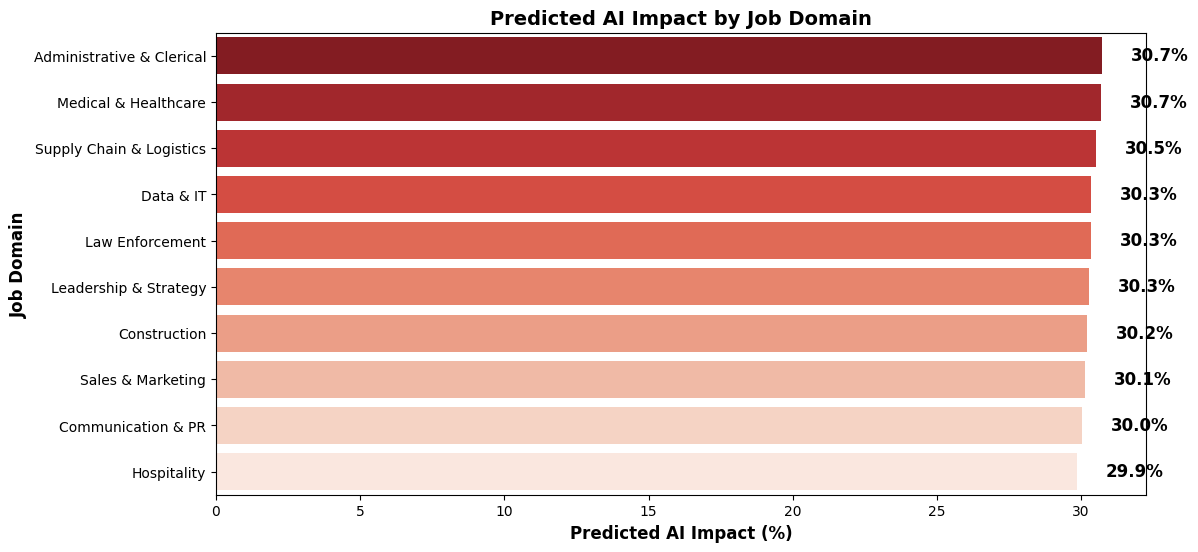

In [153]:
# Predict AI impact for job domains
df["predicted_ai_impact"] = rf_domain_model.predict(X_domain)

# Group by domain_area and find the average predicted AI impact
domain_impact = df.groupby("domain_area")["predicted_ai_impact"].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=domain_impact.values, 
    y=domain_impact.index, 
    hue=domain_impact.index, 
    legend=False,  
    palette="Reds_r"
)

# Add percentage labels to each bar
for i, v in enumerate(domain_impact.values):
    ax.text(v + 1, i, f"{v:.1f}%", color="black", va="center", fontsize=12, fontweight="bold")

# Titles and labels
plt.title("Predicted AI Impact by Job Domain", fontsize=14, fontweight="bold")
plt.xlabel("Predicted AI Impact (%)", fontsize=12, fontweight="bold")
plt.ylabel("Job Domain", fontsize=12, fontweight="bold")

plt.show()